In [1]:
import os
import subprocess
import shutil
import PIL.Image as Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from libanalysis import PhantomAnalysis as pa

In [3]:
plots_output_dir = '../disc_plots'
DEFAULT_SPLASH_OUTPUT_FILE = os.path.join(plots_output_dir,'splash.png')

In [6]:
all_end_dumps = []
for r,d,files in os.walk('..'):
    all_dumps = [os.path.join(r,f) for f in files if 'sgdisc_' in f]
    if all_dumps:
        all_end_dumps.append(sorted(all_dumps)[-1])

In [5]:
def read_dump_file(input_file):
    disc = pa(input_file)
    return disc

In [6]:
def edit_splash_limits(disc):
    # plots +/- 150au around the star
    star_xy = disc.ptmass_xyzmh[:2,0]
    xmin, xmax = (star_xy[0] - 200, star_xy[0] + 200)
    ymin, ymax = (star_xy[1] - 200, star_xy[1] + 200)
    
    # try a constant density limit across all discs
    rho_min, rho_max = (1e-2,1e4)
        
    # write new limits to splash.limits file
    splash_limits = np.genfromtxt('splash.limits')
    output = splash_limits.copy()
    # x,y limits
    output[0,0] = xmin
    output[0,1] = xmax
    output[1,0] = ymin
    output[1,1] = ymax
    # density limits
    output[5,0] = rho_min
    output[5,1] = rho_max
    #write to file
    np.savetxt('splash.limits',output,fmt='%s')
    return

In [7]:
def edit_splash_defaults():
    splash_defaults = np.genfromtxt('splash.defaults',dtype=str,delimiter='1234./,;')
    output = splash_defaults.copy()
    # ensure plotting physical units
    output = ['IRESCALE=T ,' if 'IRESCALE' in row else row for row in output]
    # increase font size
    output = ['CHARHEIGHT=  1.5 ,' if 'CHARHEIGHT' in row else row for row in output]
    # turn time legend off
    output = ['IPLOTLEGEND=  F ,' if 'IPLOTLEGEND' in row else row for row in output]
    # turn colour bar off
    output = ['ICOLOURBARSTYLE=  0 ,' if 'ICOLOURBARSTYLE' in row else row for row in output]
    # make paper size a "large square"
    output = ['IPAPERSTYLE=  3 ,' if 'IPAPERSTYLE' in row else row for row in output]
    #write to file
    np.savetxt('splash.defaults',output,fmt='%s')
    return

In [8]:
def check_disc_time(disc,input_file):
    
    if 'single' in input_file:
        binary_sep = 0
    else:
        binary_sep = int(input_file.split('/a')[1].split('/')[0])
    binary_period = 2*np.pi*binary_sep**(3./2.)
    
    print('dump time: ' + str(disc.time) + ' binary period: ' + str(binary_period))

In [9]:
def generate_png_plot(input_file,output_file=DEFAULT_SPLASH_OUTPUT_FILE):
    
    print(input_file)
    input_dir = os.path.dirname(input_file)

    if os.path.exists(os.path.join(input_dir,'splash.limits')):
        shutil.copy(os.path.join(input_dir,'splash.limits'),'.')
    else:
        shutil.copy('splash_templates/splash.limits','.')
    if os.path.exists(os.path.join(input_dir,'splash.defaults')):
        shutil.copy(os.path.join(input_dir,'splash.defaults'),'.')
    else:
        shutil.copy('splash_templates/splash.defaults','.')
    
    disc = read_dump_file(input_file)
    edit_splash_limits(disc)
    edit_splash_defaults()
    
    check_disc_time(disc,input_file)
        
    subprocess.call(['../splash',input_file,
                    '-y','2',
                    '-x','1',
                    '-r','6',
                    '-dev','/png'])
    shutil.move('splash.png',output_file)
    
    os.remove('splash.limits')
    os.remove('splash.defaults')

In [12]:
def display_plot(image_file=DEFAULT_SPLASH_OUTPUT_FILE):
    im = Image.open(image_file)
    fig = plt.figure(figsize=(12,12))
    plt.imshow(im)
    plt.xticks([])
    plt.yticks([])
    plt.show()

../a1000/mdisc0.3/sgdisc_00022
dump time: 5969.0260465 binary period: 198691.765316


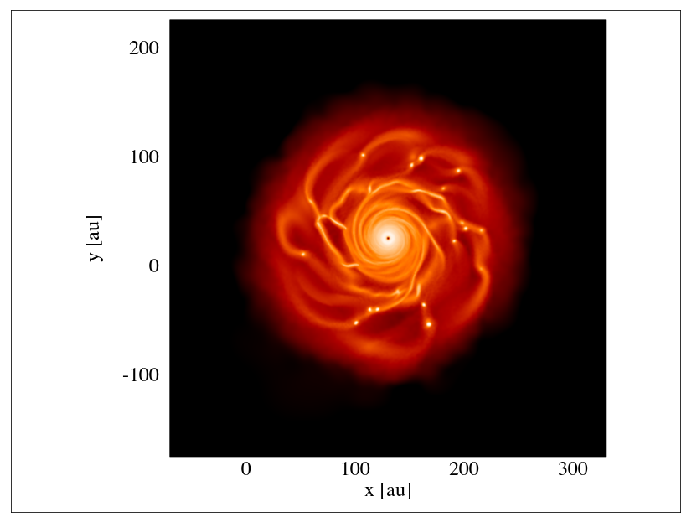

../a1000/mdisc0.4/sgdisc_00008
dump time: 4005.53063513 binary period: 198691.765316


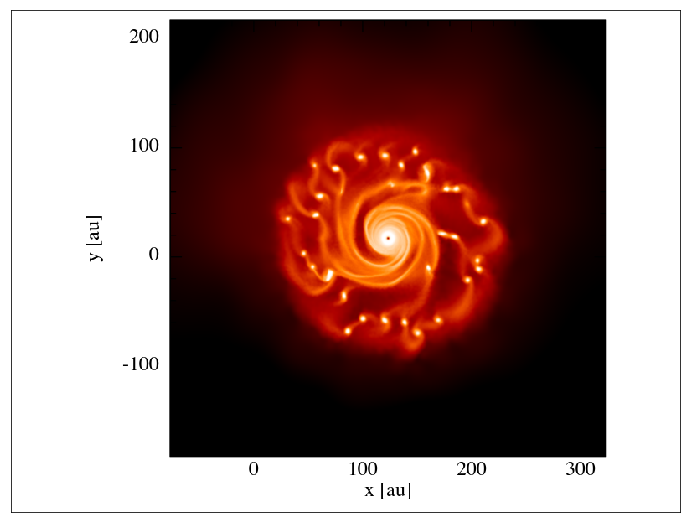

../a1000/mdisc0.2/sgdisc_00126
dump time: 32201.3247357 binary period: 198691.765316


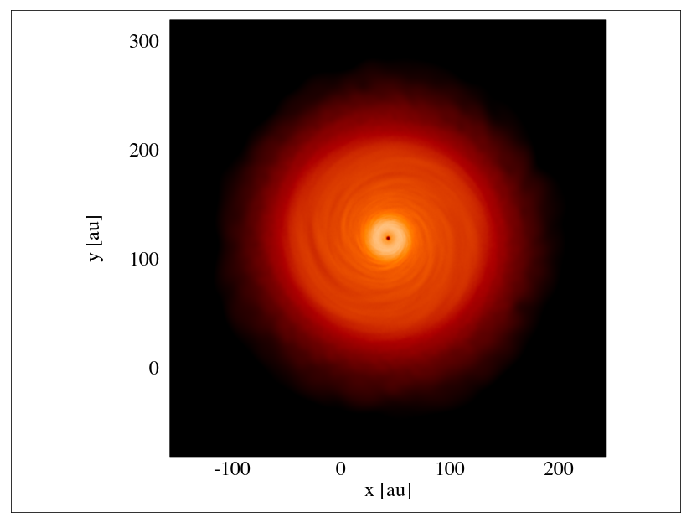

../a1000/mdisc0.1/sgdisc_00096
dump time: 31415.92655 binary period: 198691.765316


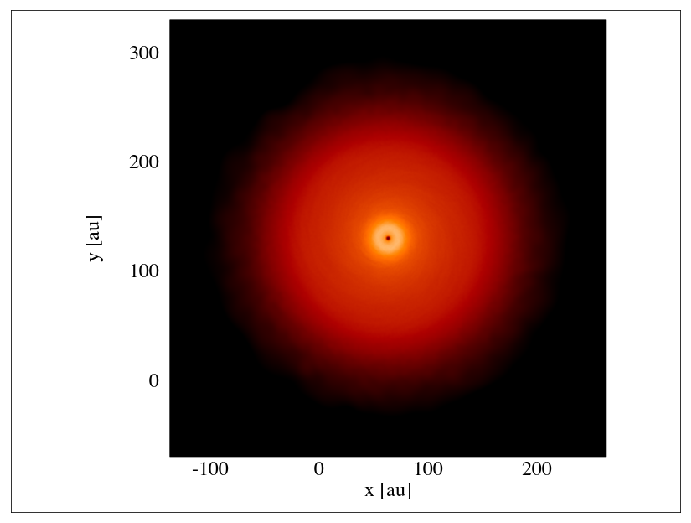

../a150/i90/mdisc0.2/sgdisc_00033
dump time: 10701.9 binary period: 11542.9484715


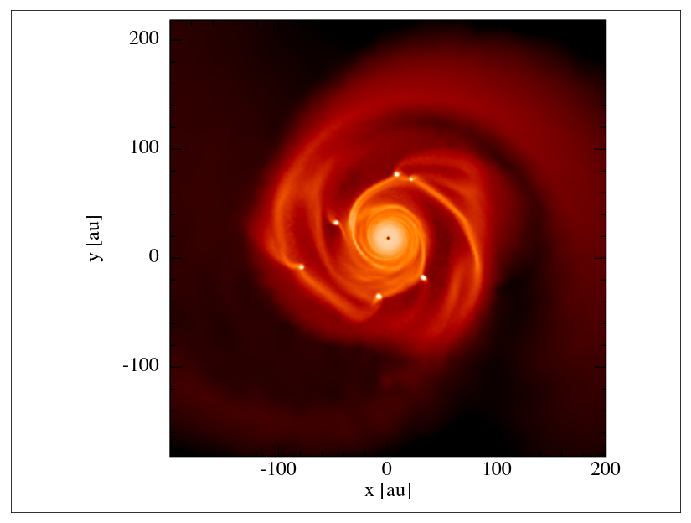

../a150/i30/mdisc0.2/sgdisc_00025
dump time: 7702.125 binary period: 11542.9484715


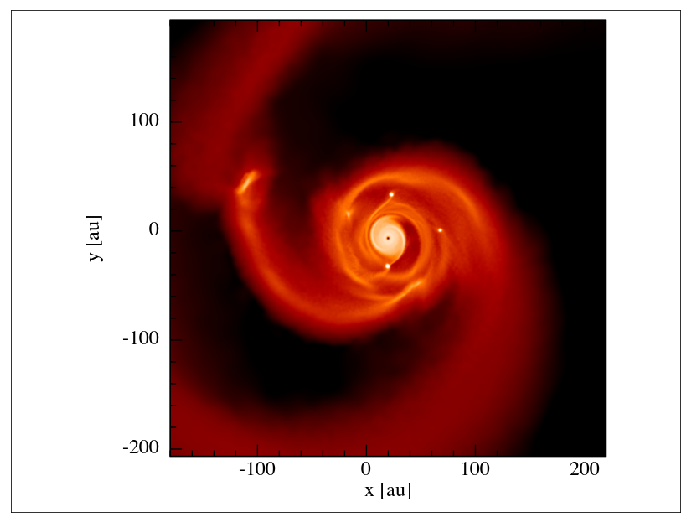

../a150/mstar0.1/mdisc0.2/sgdisc_00026
dump time: 9738.65 binary period: 11542.9484715


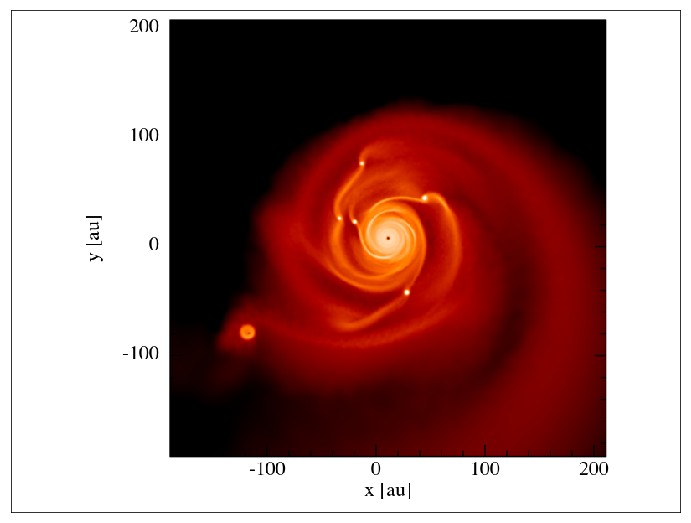

../a150/e0.5/mdisc0.2/sgdisc_00121
dump time: 40212.38604 binary period: 11542.9484715


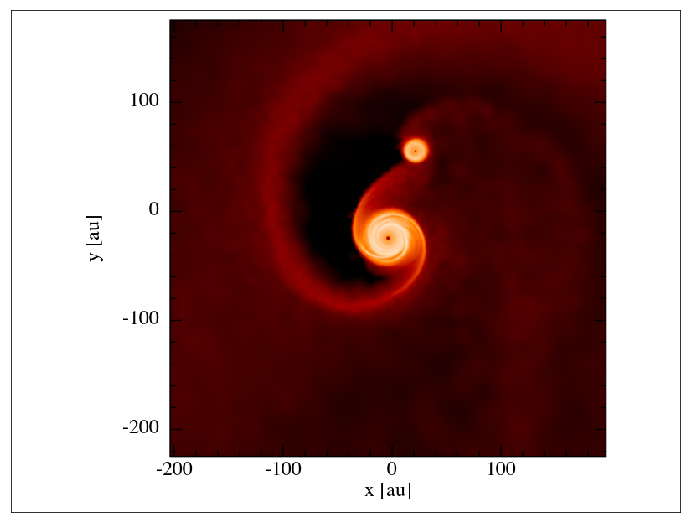

../a150/e0.75/mdisc0.2/sgdisc_00121
dump time: 22933.62641 binary period: 11542.9484715


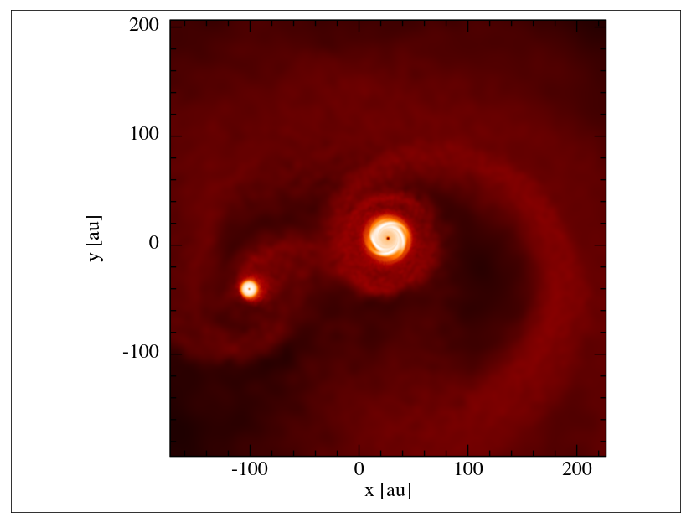

../a150/mdisc0.2/sgdisc_00030
dump time: 6754.42420825 binary period: 11542.9484715


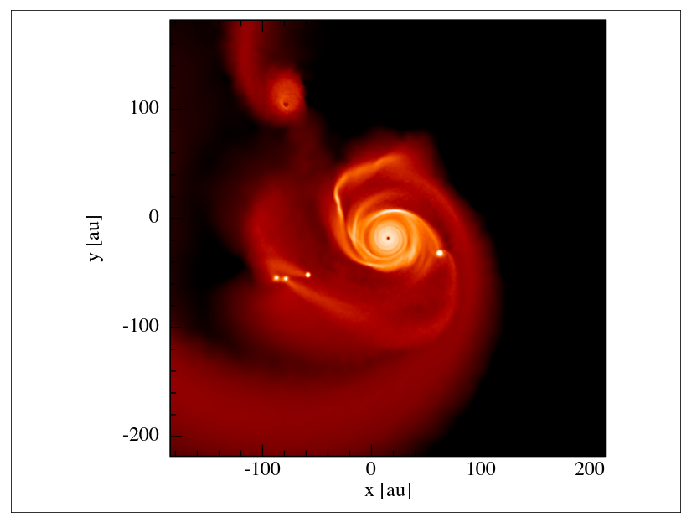

../a150/i60/mdisc0.2/sgdisc_00026
dump time: 8535.8 binary period: 11542.9484715


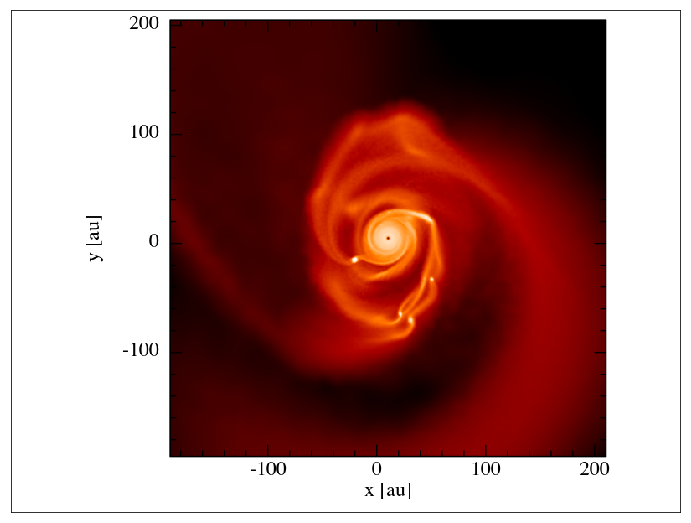

../a150/mstar0.5/mdisc0.2/sgdisc_00029
dump time: 6217.18125 binary period: 11542.9484715


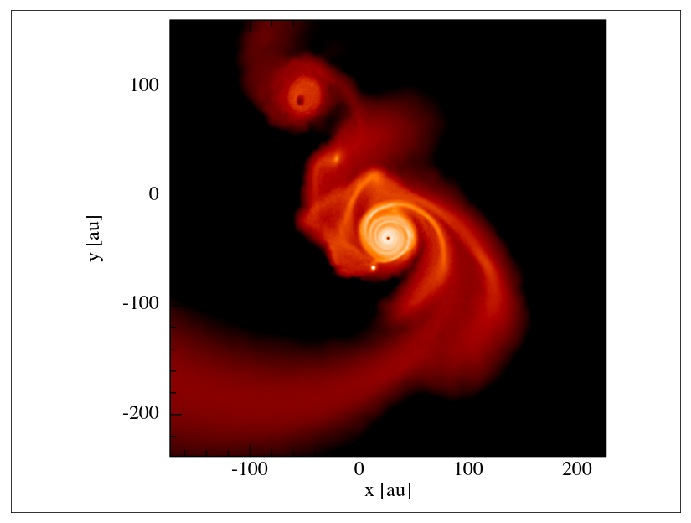

../a150/e0.25/mdisc0.2/sgdisc_00011
dump time: 6911.503841 binary period: 11542.9484715


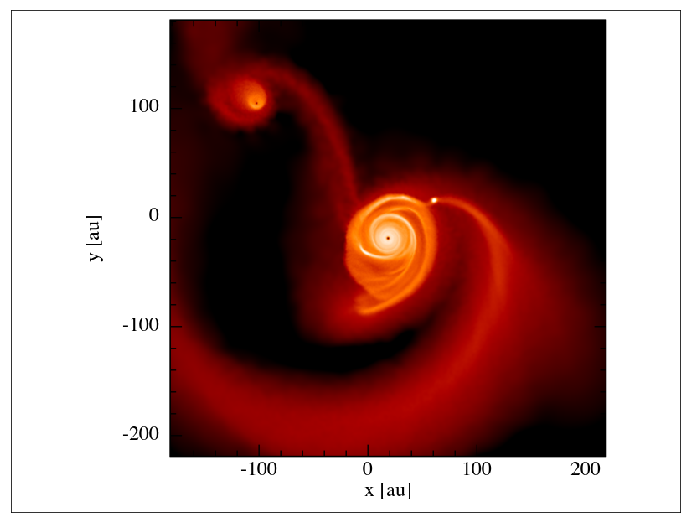

../a325/mstar0.1/mdisc0.2/sgdisc_00100
dump time: 32800.1836914 binary period: 36813.3135472


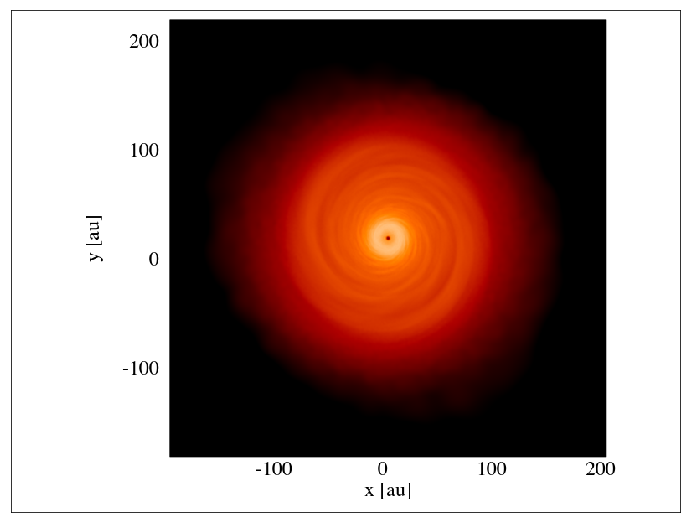

../a325/e0.5/mdisc0.2/sgdisc_00084
dump time: 18221.1819628 binary period: 36813.3135472


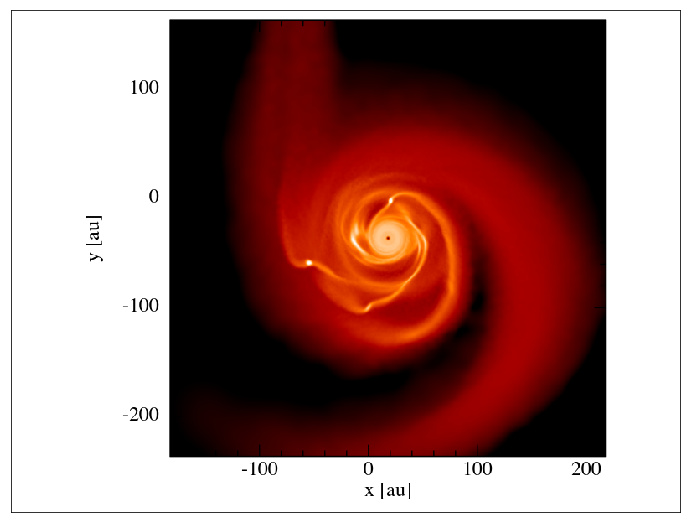

../a325/e0.75/mdisc0.2/sgdisc_00164
dump time: 26783.2918123 binary period: 36813.3135472


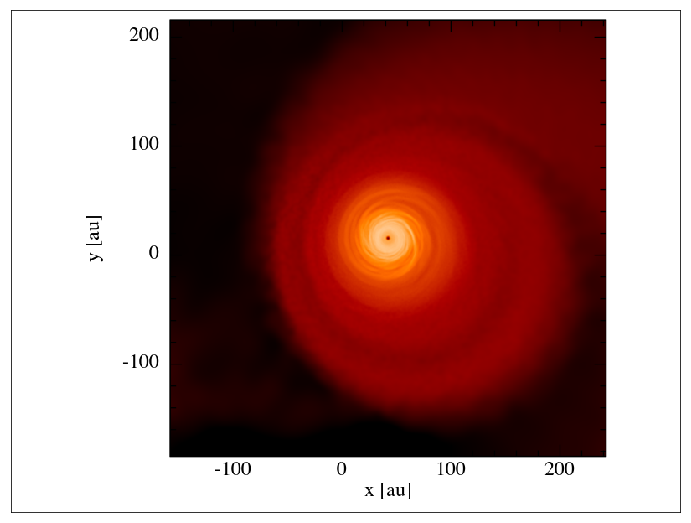

../a325/e0.75/mdisc0.2/sgdisc_00118
dump time: 19556.7129263 binary period: 36813.3135472


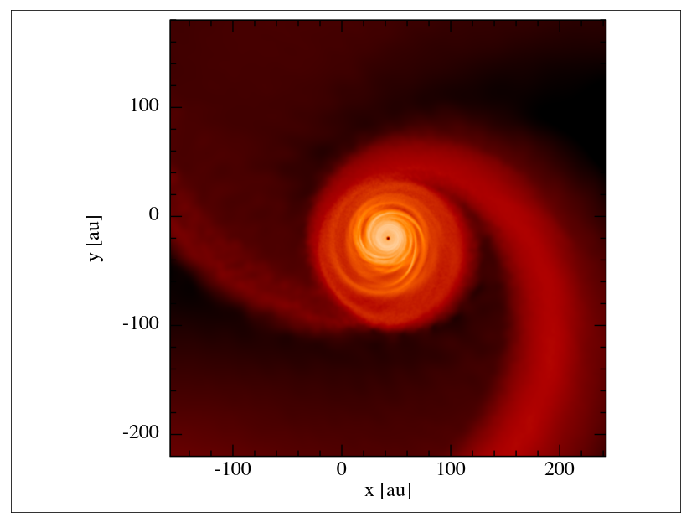

../a325/mdisc0.2/sgdisc_00205
dump time: 36913.7137272 binary period: 36813.3135472


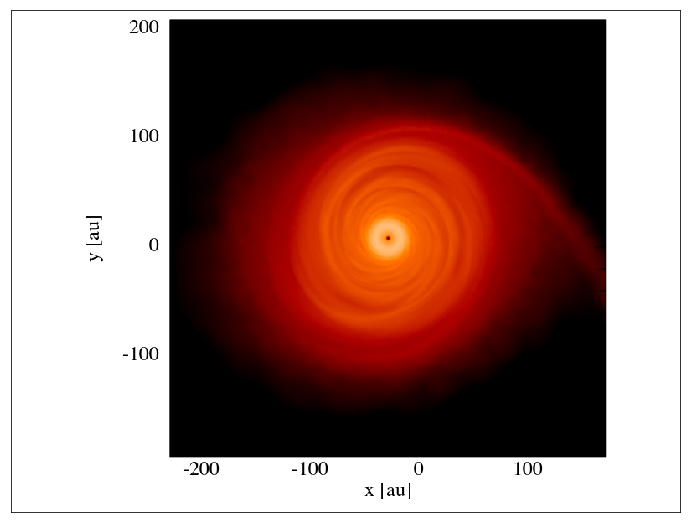

../a325/mstar0.5/mdisc0.2/sgdisc_00050
dump time: 31415.0 binary period: 36813.3135472


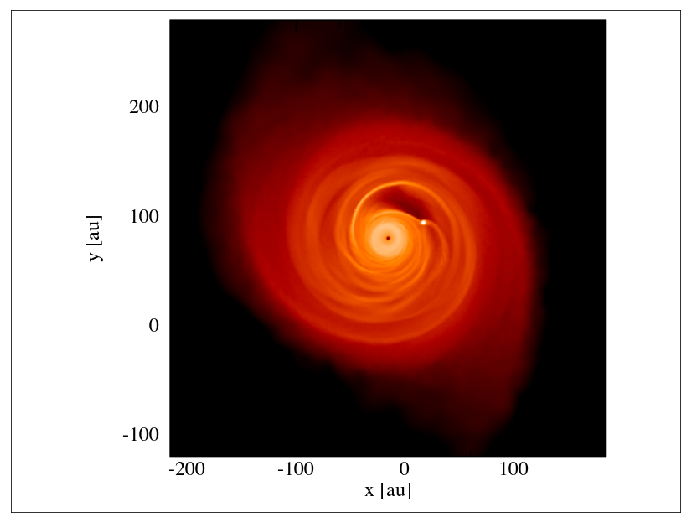

../a325/e0.25/mdisc0.2/sgdisc_00060
dump time: 37698.0 binary period: 36813.3135472


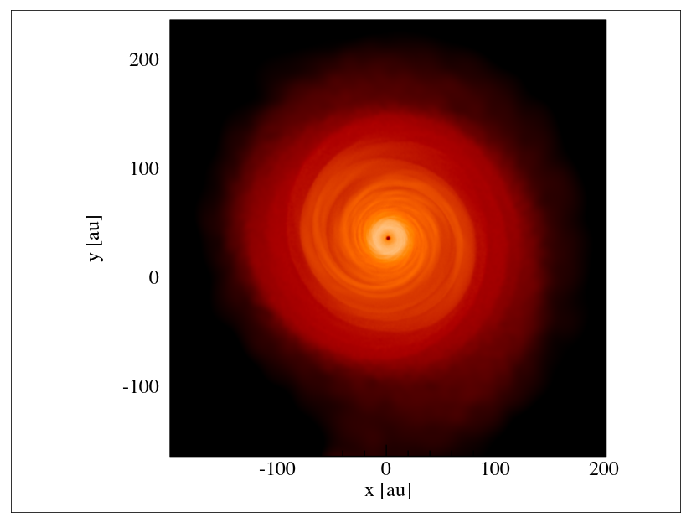

../a250/i90/mdisc0.2/sgdisc_00100
dump time: 32430.0 binary period: 24836.4706645


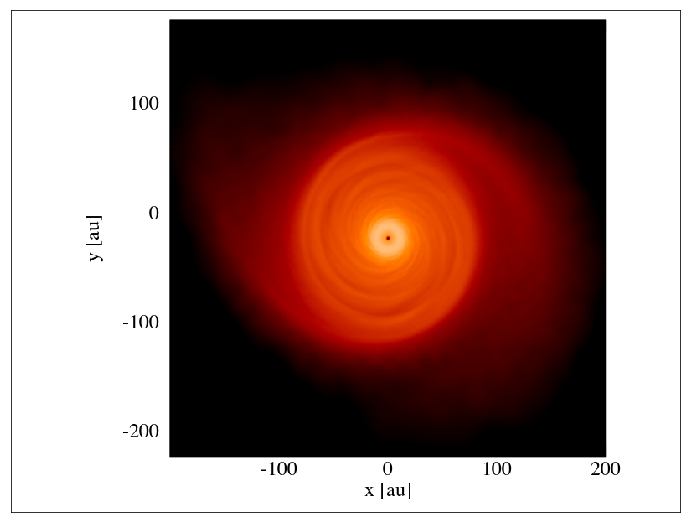

../a250/i30/mdisc0.2/sgdisc_00199
dump time: 64300.0757813 binary period: 24836.4706645


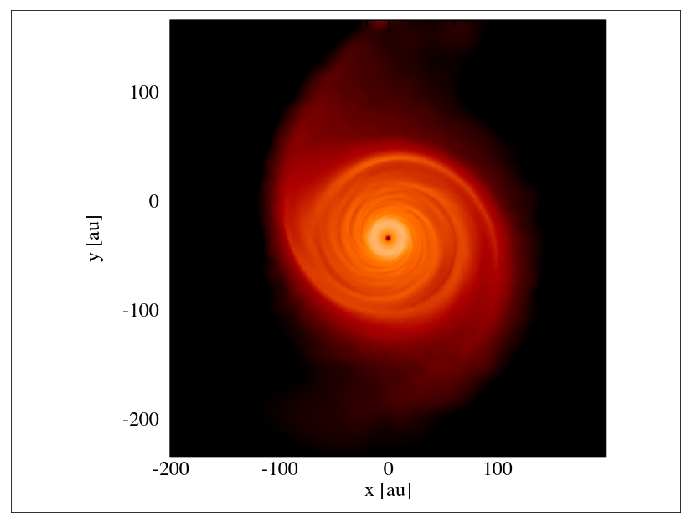

../a250/mstar0.1/mdisc0.2/sgdisc_00076
dump time: 29530.1 binary period: 24836.4706645


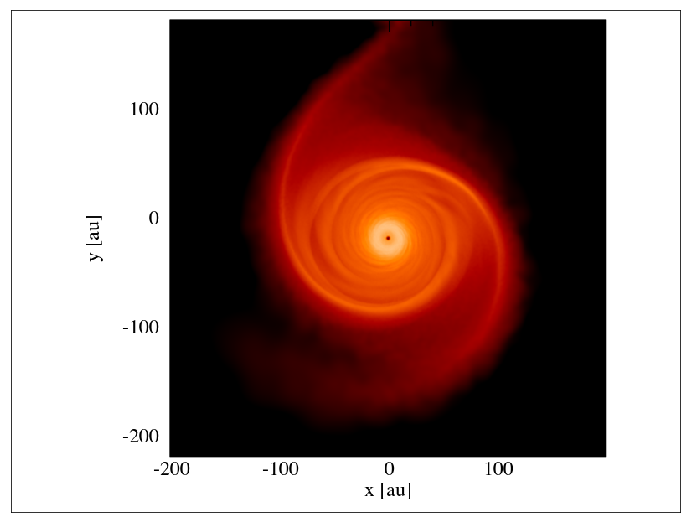

../a250/mdisc0.3/sgdisc_00004
dump time: 7935.372235 binary period: 24836.4706645


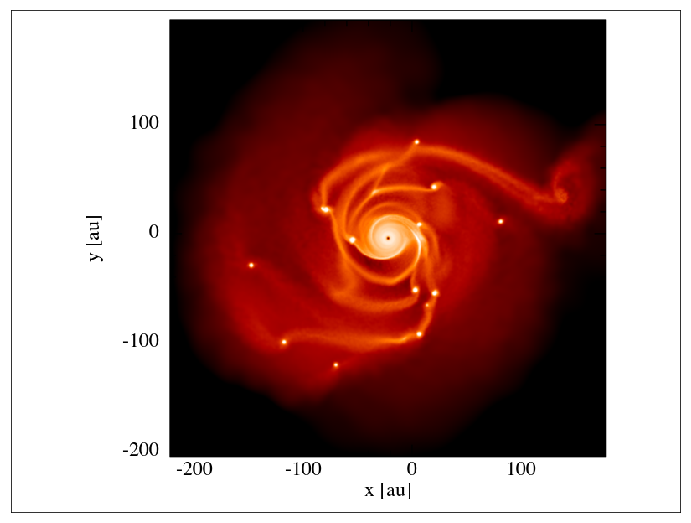

../a250/mdisc0.4/sgdisc_00003
dump time: 4534.49842 binary period: 24836.4706645


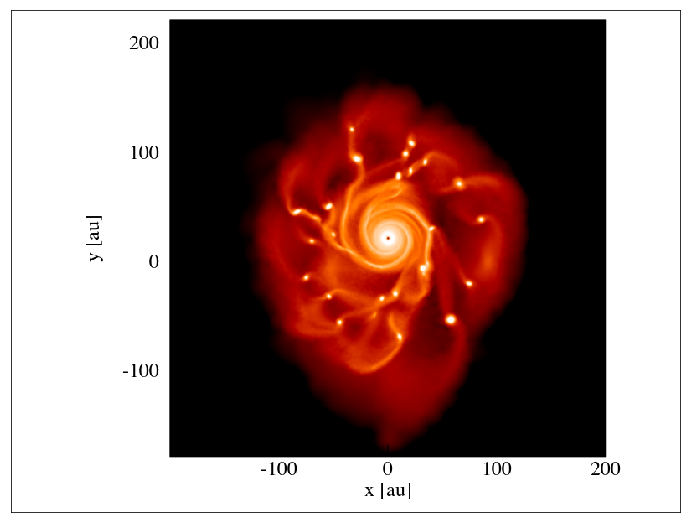

../a250/e0.5/mdisc0.2f1/sgdisc_00057
dump time: 12923.320497 binary period: 24836.4706645


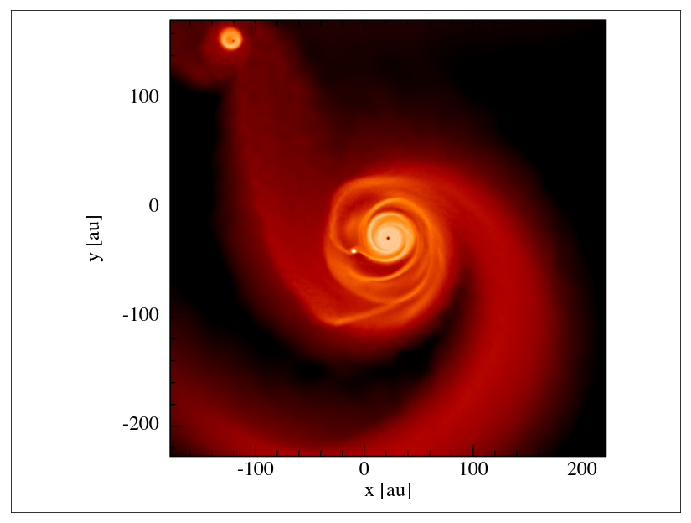

../a250/e0.75/mdisc0.2f1/sgdisc_00070
dump time: 15870.74447 binary period: 24836.4706645


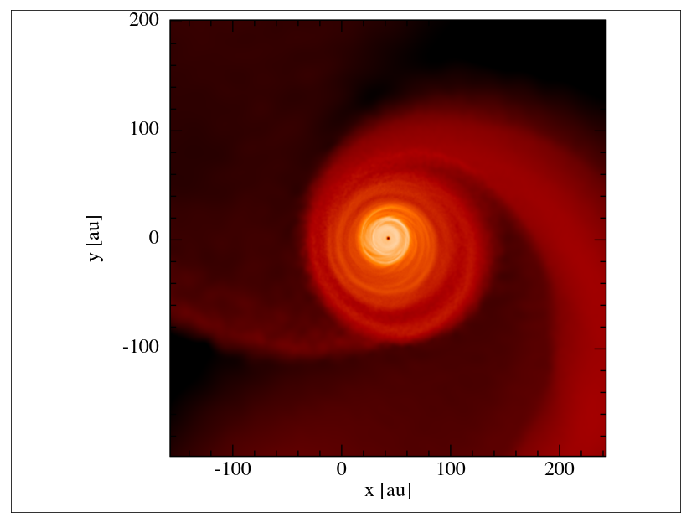

../a250/mdisc0.2/sgdisc_00046
dump time: 26781.881185 binary period: 24836.4706645


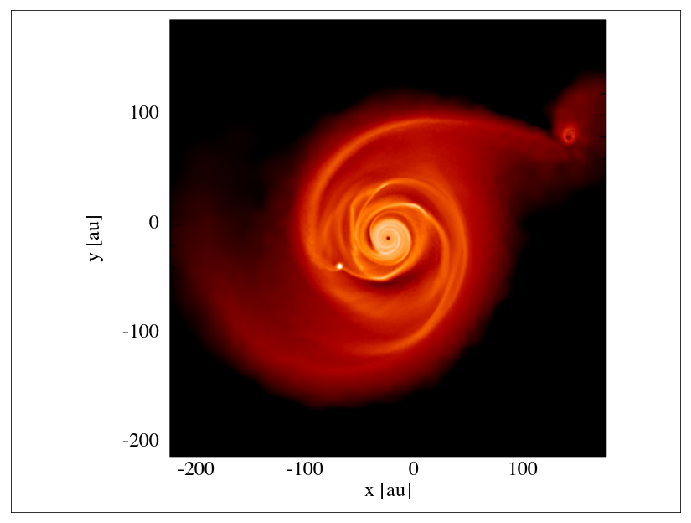

../a250/i60/mdisc0.2/sgdisc_00100
dump time: 32430.0 binary period: 24836.4706645


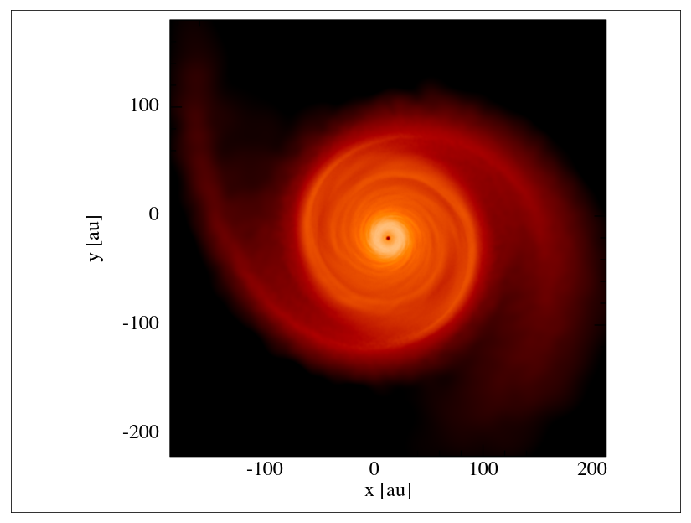

../a250/mstar0.5/mdisc0.2/sgdisc_00057
dump time: 11466.8131907 binary period: 24836.4706645


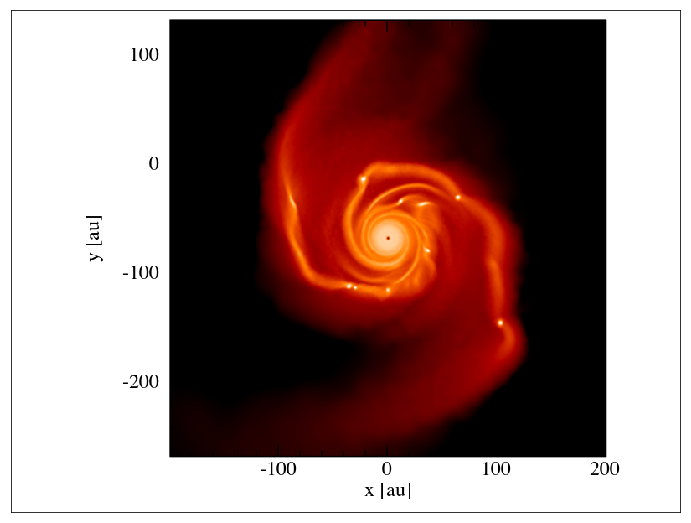

../a250/e0.25/mdisc0.2f1/sgdisc_00026
dump time: 16336.281806 binary period: 24836.4706645


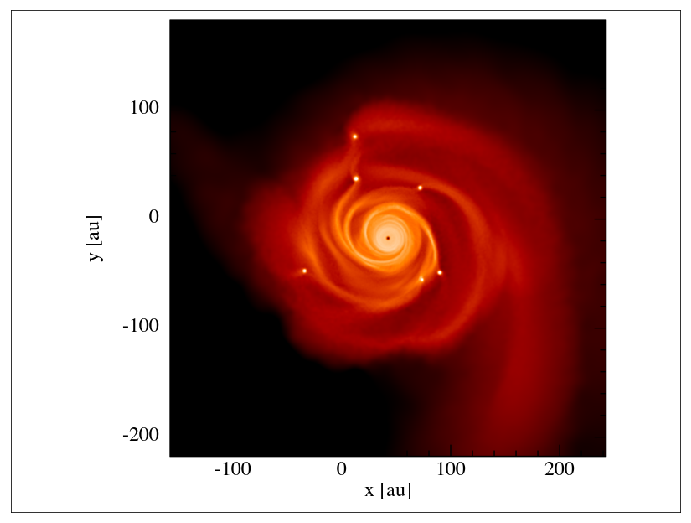

../a250/mdisc0.1/sgdisc_00047
dump time: 32875.113545 binary period: 24836.4706645


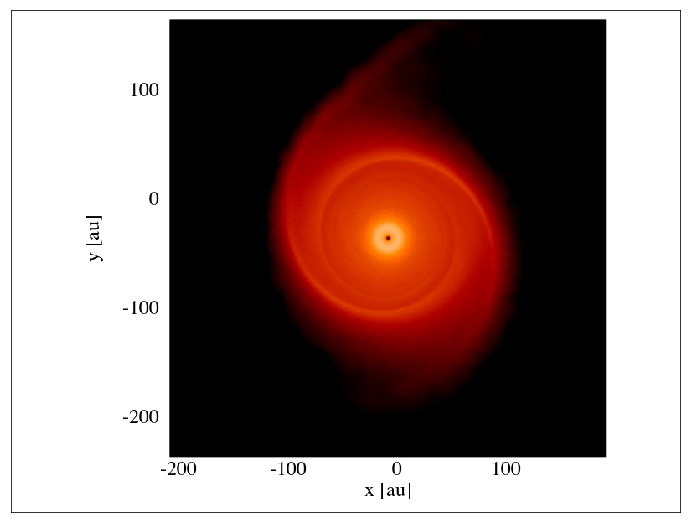

../single/mdisc0.3/sgdisc_00054
dump time: 6440.26494337 binary period: 0.0


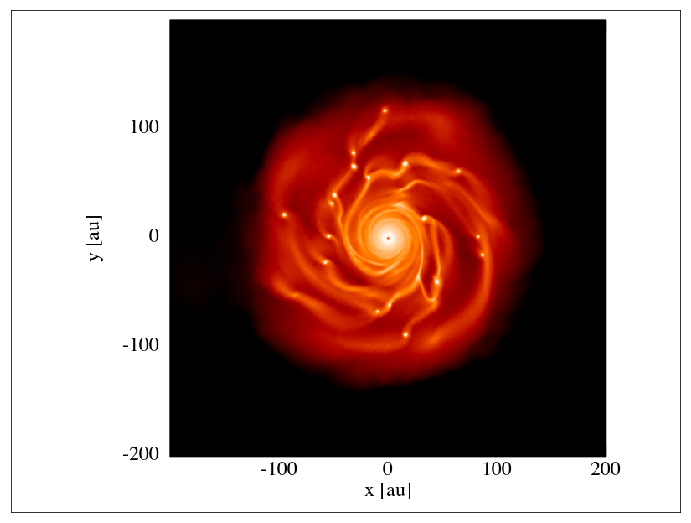

../single/mdisc0.4/sgdisc_00009
dump time: 4712.3889825 binary period: 0.0


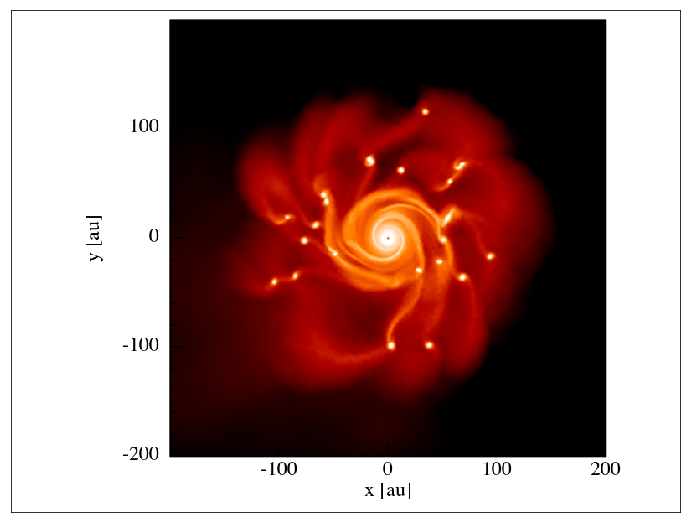

../single/mdisc0.2/sgdisc_00050
dump time: 31415.92655 binary period: 0.0


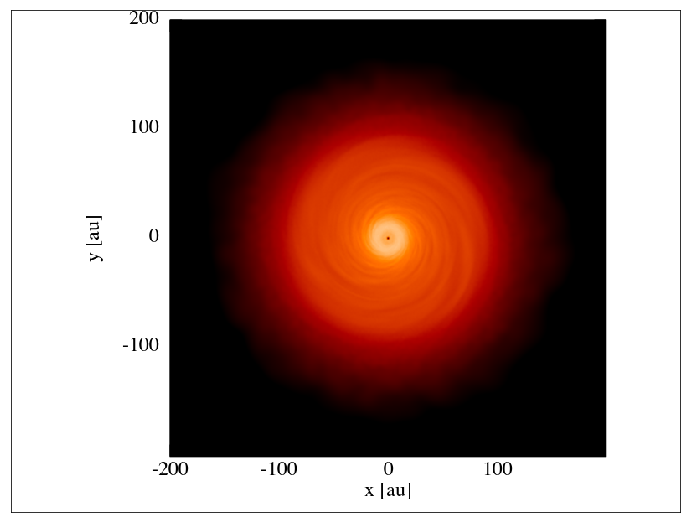

../single/mdisc0.1/sgdisc_00050
dump time: 31415.92655 binary period: 0.0


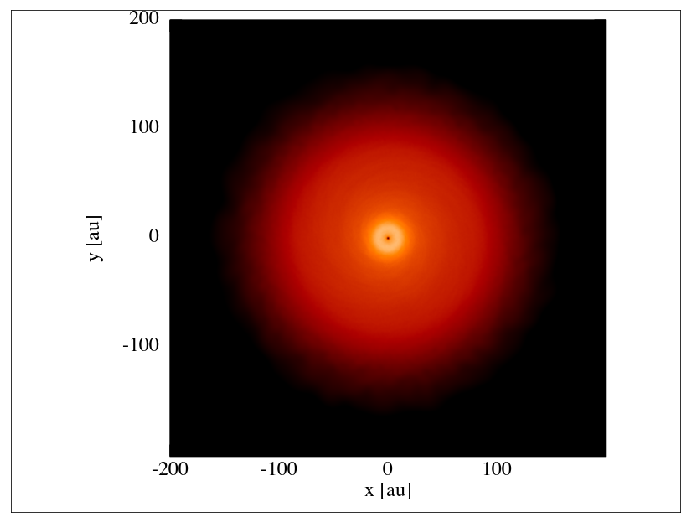

../a400/e0.5/mdisc0.2/sgdisc_00054
dump time: 24778.384758 binary period: 50265.4824574


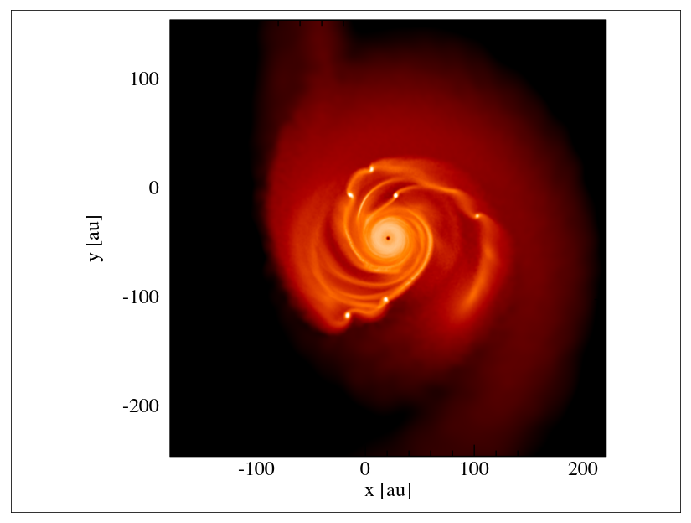

../a400/e0.75/mdisc0.2/sgdisc_00132
dump time: 40609.0194645 binary period: 50265.4824574


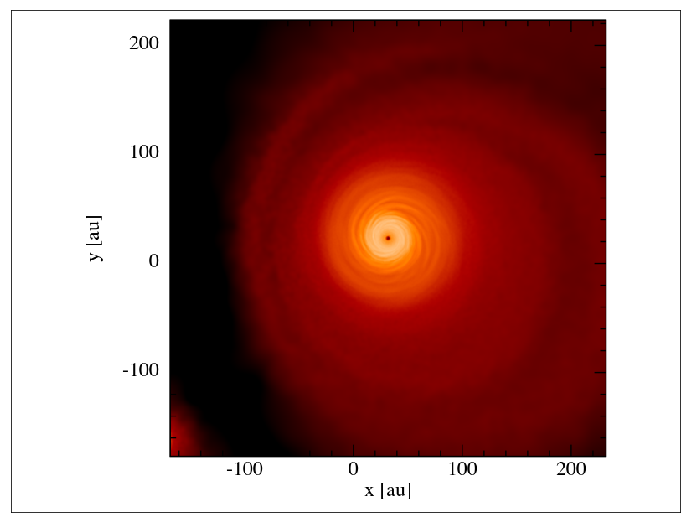

../a400/mdisc0.2/sgdisc_00138
dump time: 38316.79943 binary period: 50265.4824574


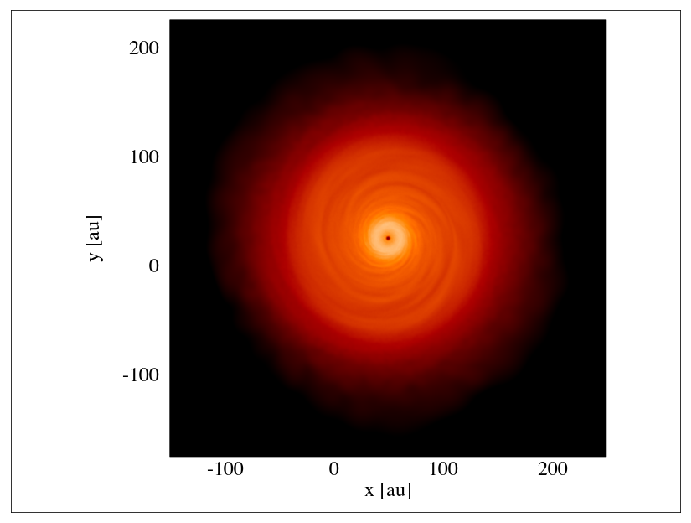

../a400/mstar0.5/mdisc0.2/sgdisc_00058
dump time: 36040.1224609 binary period: 50265.4824574


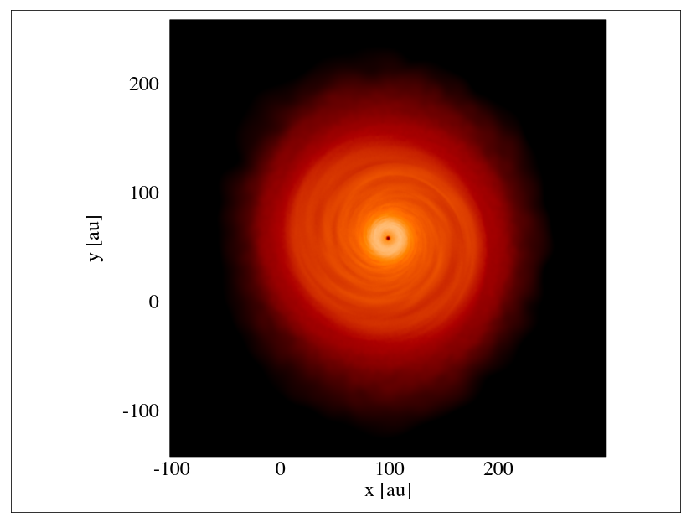

../a400/e0.25/mdisc0.2/sgdisc_00101
dump time: 45890.1546925 binary period: 50265.4824574


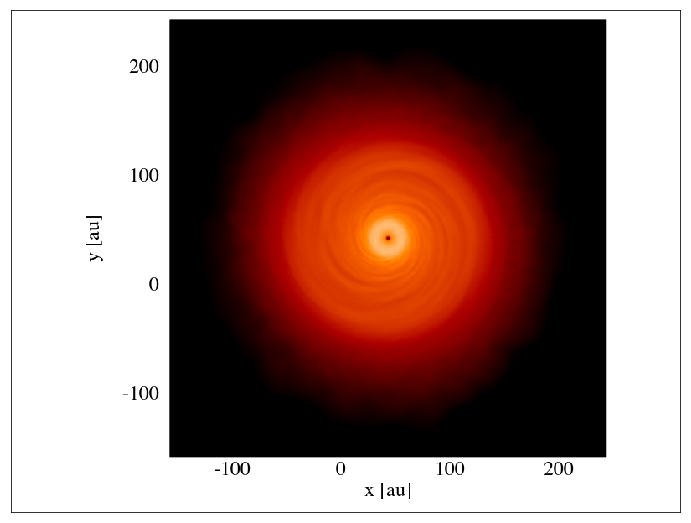

../a100/i90/mdisc0.2/sgdisc_00059
dump time: 11080.125 binary period: 6283.18530718


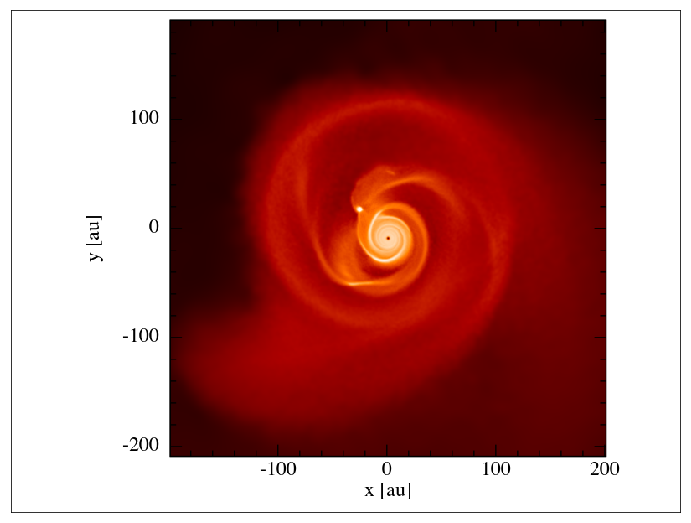

../a100/i30/mdisc0.2/sgdisc_00100
dump time: 32830.0 binary period: 6283.18530718


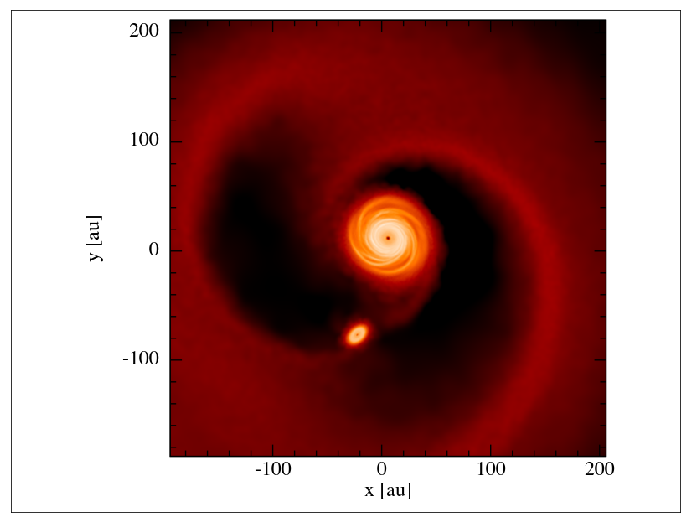

../a100/mdisc0.3/sgdisc_00013
dump time: 6911.503841 binary period: 6283.18530718


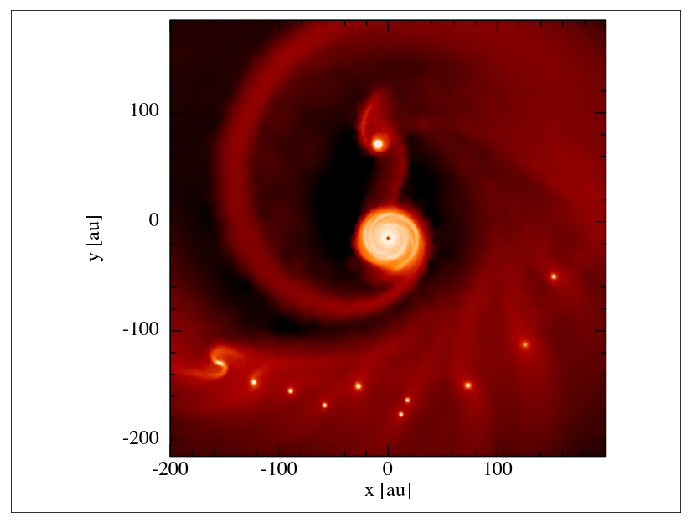

../a100/mdisc0.4/sgdisc_00010
dump time: 3573.5616451 binary period: 6283.18530718


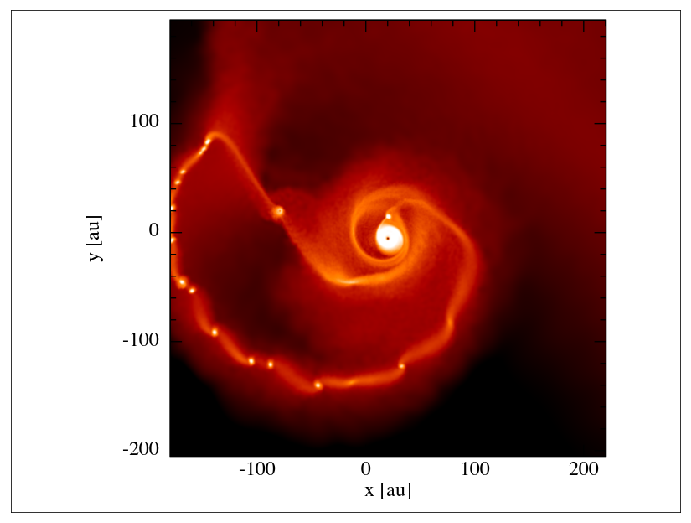

../a100/mdisc0.2/sgdisc_00096
dump time: 31730.0858565 binary period: 6283.18530718


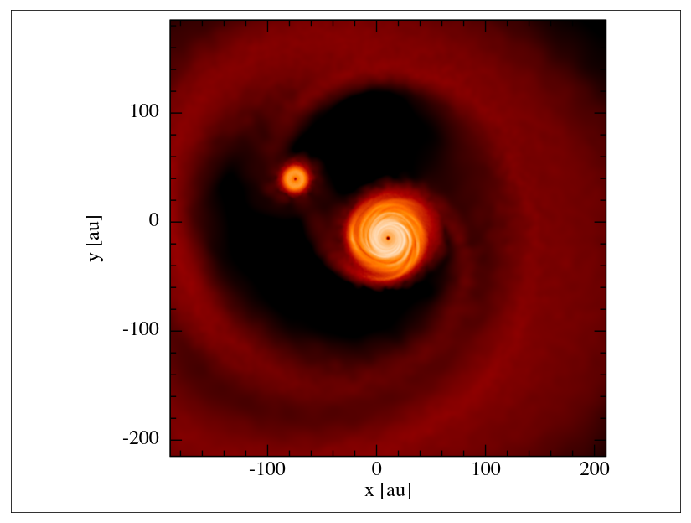

../a100/i60/mdisc0.2/sgdisc_00030
dump time: 9849.0 binary period: 6283.18530718


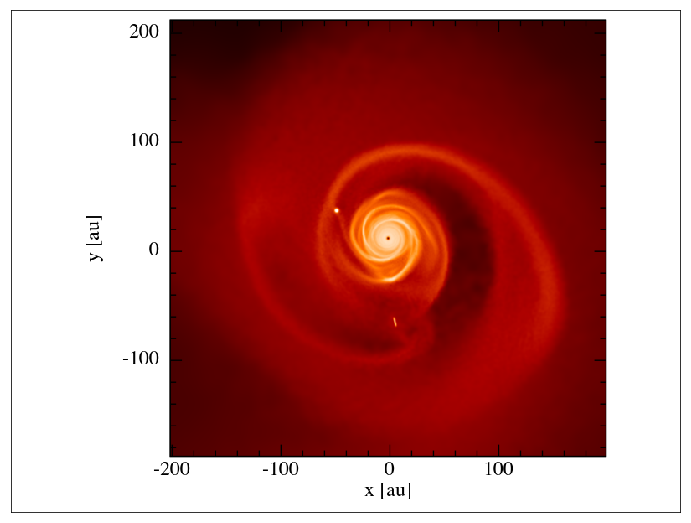

../a100/mdisc0.1/sgdisc_00055
dump time: 31546.554655 binary period: 6283.18530718


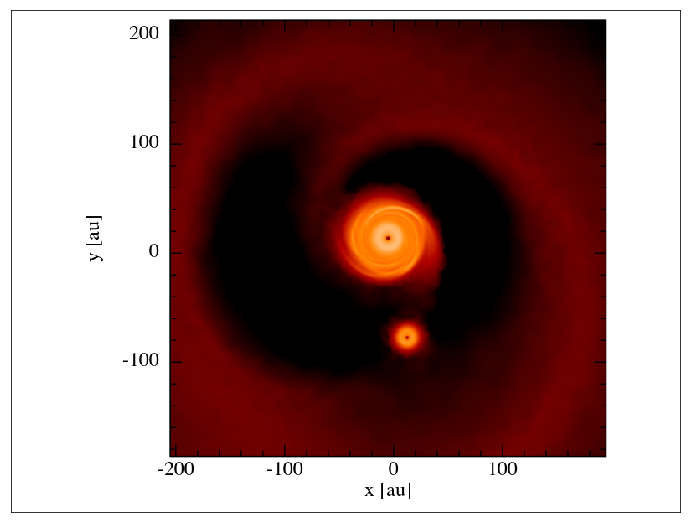

../a500/mdisc0.3/sgdisc_00002
dump time: 8015.9364375 binary period: 70248.1473104


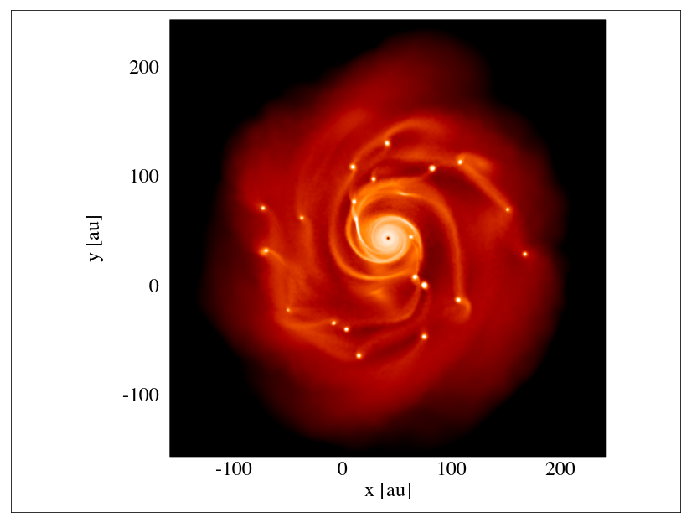

../a500/mdisc0.4/sgdisc_00060
dump time: 6000.0 binary period: 70248.1473104


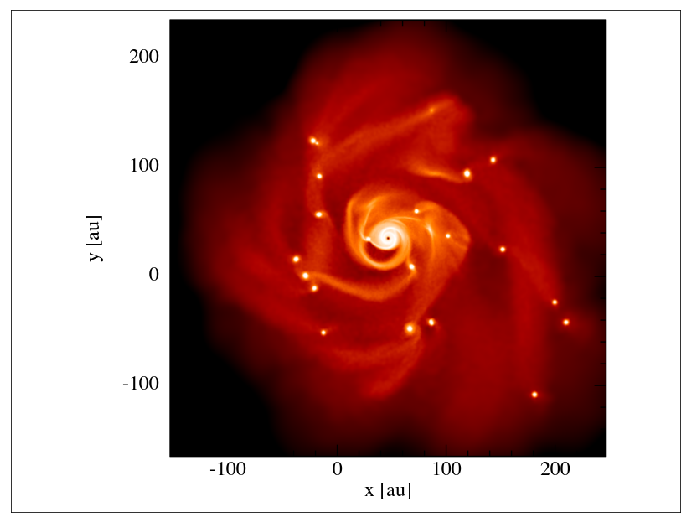

../a500/e0.5/mdisc0.2f1/sgdisc_00086
dump time: 55149.64269 binary period: 70248.1473104


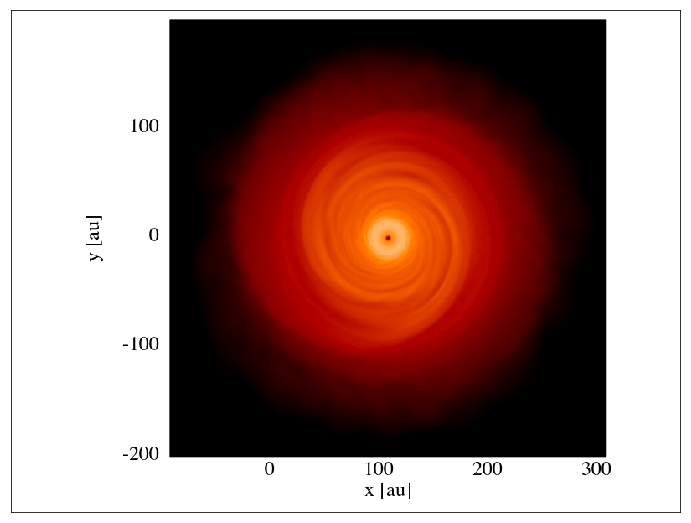

../a500/e0.5/mdisc0.2f1/sgdisc_00064
dump time: 41041.59456 binary period: 70248.1473104


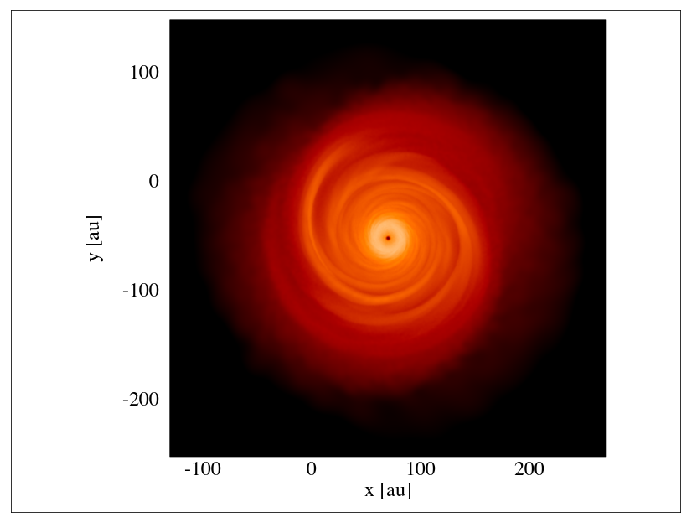

../a500/e0.75/mdisc0.2f1/sgdisc_00114
dump time: 50981.3557425 binary period: 70248.1473104


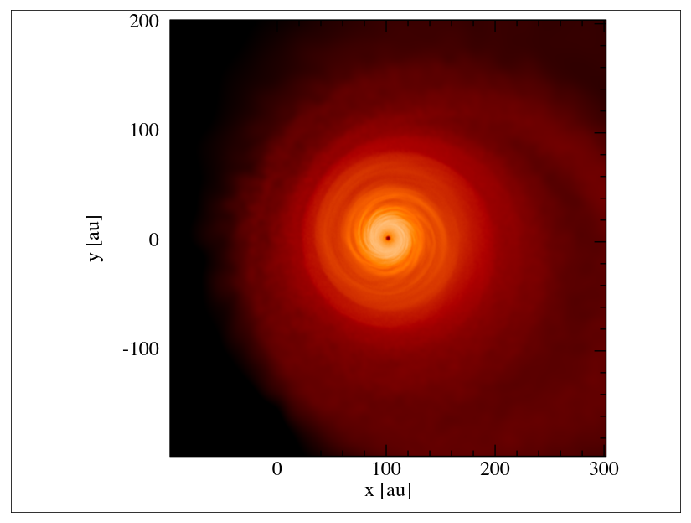

../a500/mdisc0.2/sgdisc_00111
dump time: 31573.0061827 binary period: 70248.1473104


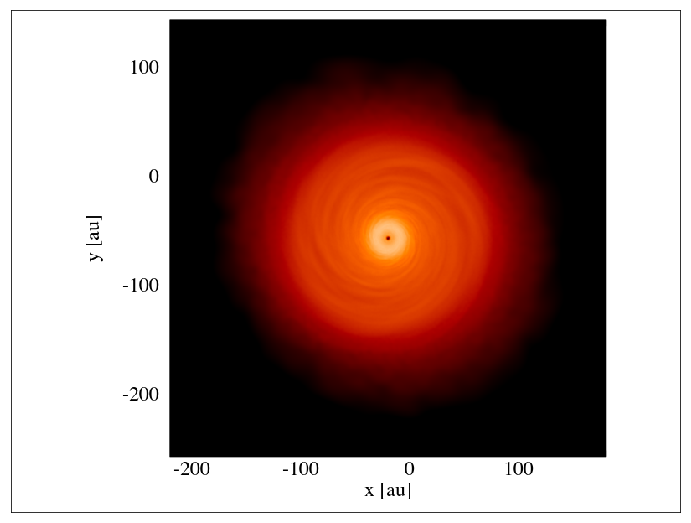

../a500/e0.25/mdisc0.2f1/sgdisc_00080
dump time: 51301.9932 binary period: 70248.1473104


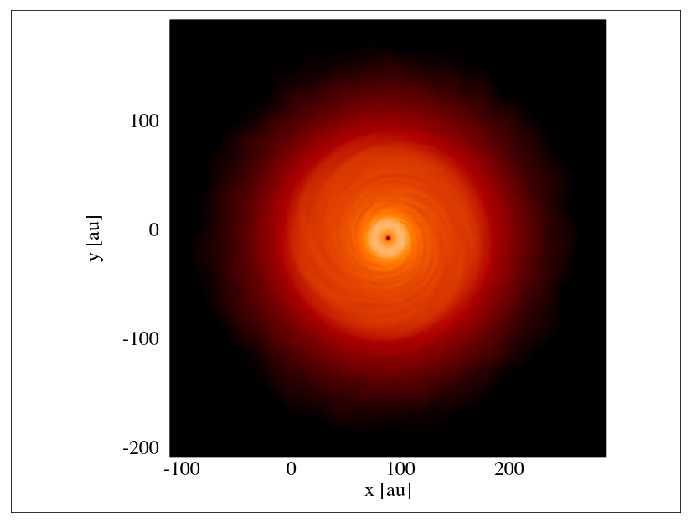

../a500/mdisc0.1/sgdisc_00050
dump time: 31415.92655 binary period: 70248.1473104


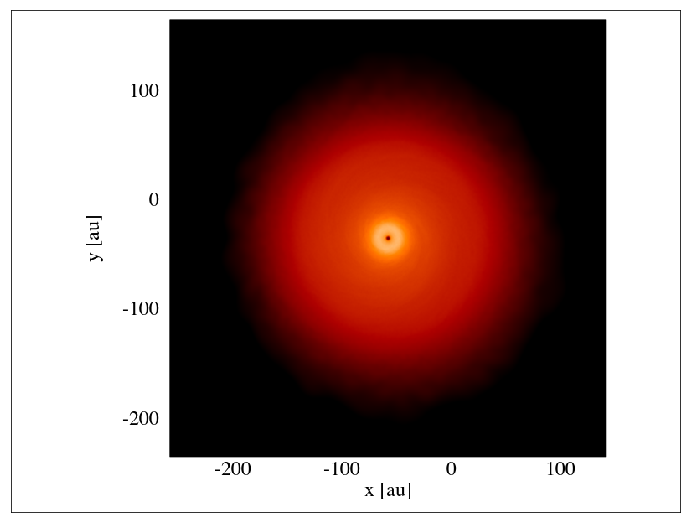

../a200/i90/mdisc0.2/sgdisc_00100
dump time: 32430.0 binary period: 17771.5317526


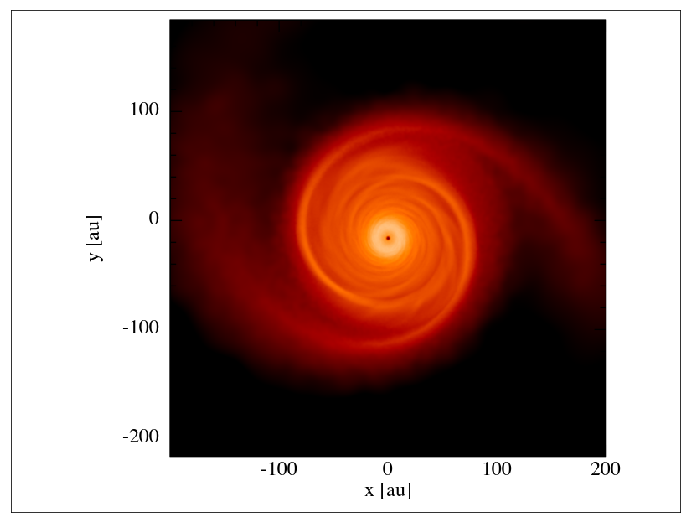

../a200/i30/mdisc0.2/sgdisc_00043
dump time: 13944.9 binary period: 17771.5317526


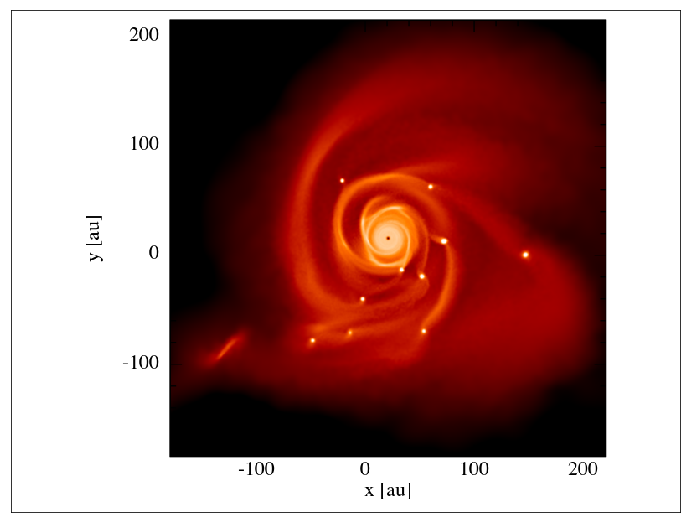

../a200/e0.5/mdisc0.2/sgdisc_00113
dump time: 38955.7489585 binary period: 17771.5317526


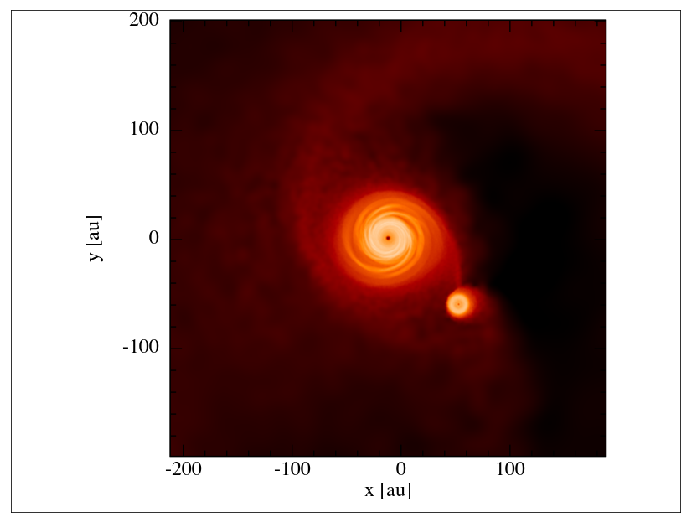

../a200/e0.75/mdisc0.2/sgdisc_00041
dump time: 12094.9957975 binary period: 17771.5317526


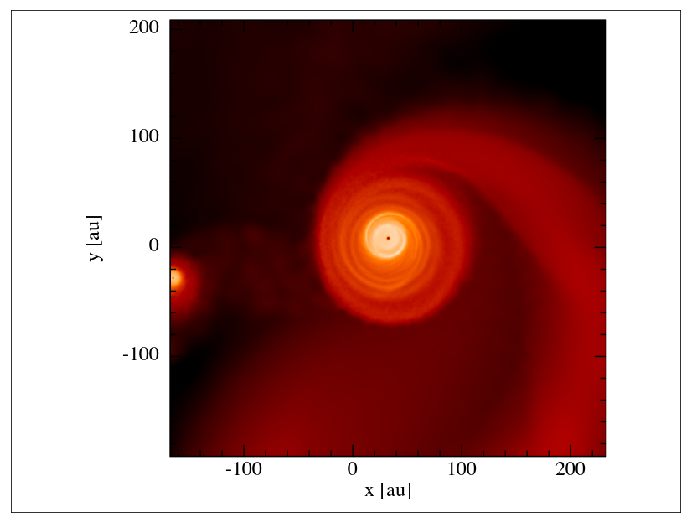

../a200/mdisc0.2/sgdisc_00020
dump time: 12566.37062 binary period: 17771.5317526


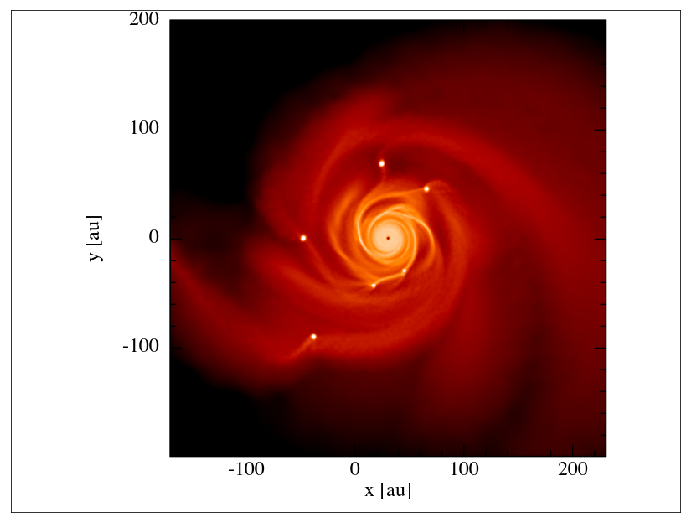

../a200/i60/mdisc0.2/sgdisc_00077
dump time: 24808.95 binary period: 17771.5317526


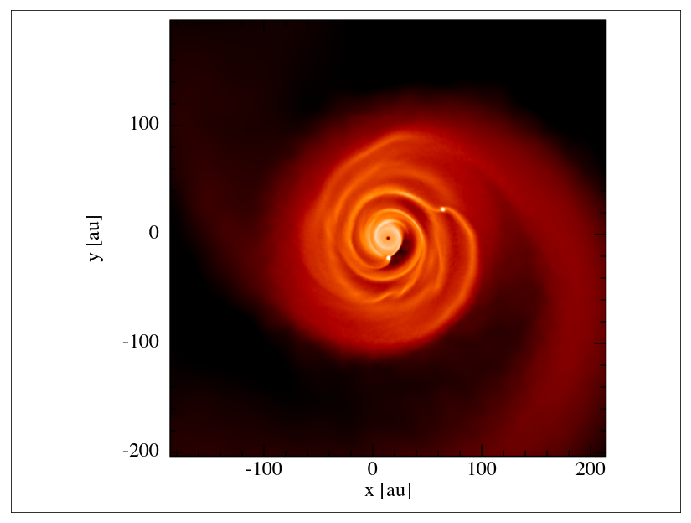

../a200/e0.25/mdisc0.2/sgdisc_00016
dump time: 10053.096496 binary period: 17771.5317526


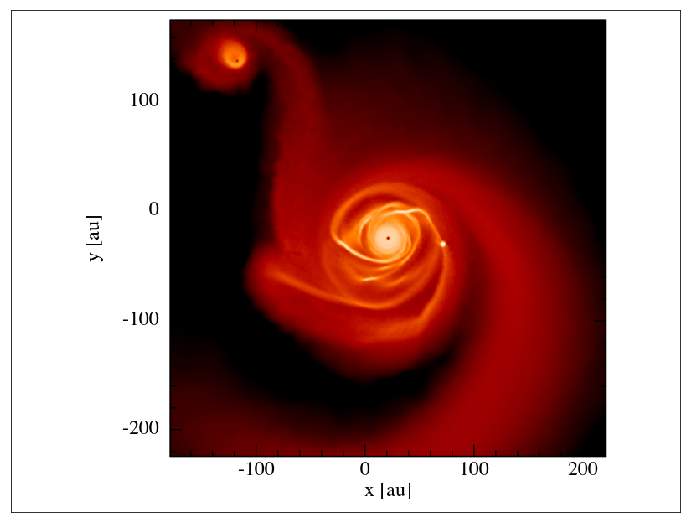

In [13]:
# plot all discs
for dump in all_end_dumps:
    plot_id = dump.split('../')[1].split('/sgdisc')[0].replace('/','_').replace('.','') + '.png'
    output_fname = os.path.join(plots_output_dir,plot_id)
    # generate and save the plot
    generate_png_plot(dump,output_fname)
    # display the plot
    display_plot(output_fname)